<a href="https://colab.research.google.com/github/Coolinglass/Applied-Machine-Learning-Projects/blob/master/Neural_Net_Bigmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.0.2


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].max()

Outlet_Size
High      10256.6490
Medium    13086.9648
Small      9779.9362
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Size'>

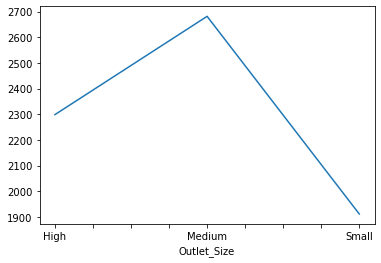

In [ ]:
data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot()

In [ ]:
common = data['Outlet_Size'].isnull()
all_conditions = [(data['Item_Outlet_Sales'] <= 2200) & (common),
                  (data['Item_Outlet_Sales'] > 2600)  & (common),
                  (data['Item_Outlet_Sales'] > 2200) & (data['Item_Outlet_Sales'] < 2600) & (common)
                 ]

fill_with = ['Small', 'Medium', 'High']
data['Outlet_Size'] = np.select(all_conditions, fill_with, default=data['Outlet_Size'])

In [ ]:
data['Outlet_Size'].value_counts()

Small     3995
Medium    3429
High      1099
Name: Outlet_Size, dtype: int64

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
# create a list of our conditions
conditions = [
    (data['Item_Weight'] == 'Nan'),
    (data['Item_Weight'] > 4.50) & (data['Item_Weight'] <= 8.773),
    (data['Item_Weight'] > 8.773) & (data['Item_Weight'] <= 12.60),
    (data['Item_Weight'] > 12.60) & (data['Item_Weight'] <= 16.85),
    (data['Item_Weight'] > 16.85)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2', '3','4']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Item_Weight_revised'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,4
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2


In [ ]:
data.groupby(['Item_Weight_revised'])['Item_MRP'].mean()

Item_Weight_revised
0    139.796485
1    137.792335
2    141.274333
3    140.372708
4    145.584520
Name: Item_MRP, dtype: float64

In [ ]:
data['Item_Weight_revised'].replace(to_replace = '0', value = pd.NA, inplace=True)

In [ ]:
common1 = data['Item_Weight_revised'].isnull()
all_conditions1 = [(data['Item_MRP'] <= 137.79) & (common1),
                  (data['Item_MRP'] > 137.79)  & (data['Item_MRP'] < 140.37) & (common1),
                   (data['Item_MRP'] >= 140.37)  & (data['Item_MRP'] < 141.27) & (common1),
                  (data['Item_MRP'] >= 141.27)  & (common1)

                 ]

fill_with1 = ['1', '3', '2','4']
data['Item_Weight_revised'] = np.select(all_conditions1, fill_with1, default=data['Item_Weight_revised'])

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_revised             0
dtype: int64

In [ ]:
data['Item_Weight_revised'].value_counts()

4    2493
1    2467
2    1787
3    1776
Name: Item_Weight_revised, dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,4
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2


In [ ]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
data['item_identified_first_3'] = data['Item_Identifier'].astype(str).str[0:2]

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised,item_identified_first_3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,4,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2,NC


In [ ]:
data['item_identified_first_3'].value_counts()

FD    6125
NC    1599
DR     799
Name: item_identified_first_3, dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_revised           object
item_identified_first_3       object
dtype: object

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.loc[data["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
data.loc[data["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
data.loc[data["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = 'Regular'

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_revised           object
item_identified_first_3       object
dtype: object

In [ ]:
data['Item_Visibility'] = data['Item_Visibility'].astype('float')
data['Item_MRP'] = data['Item_MRP'].astype('float')
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].astype('float')
data['Item_Weight_revised'] = data['Item_Weight_revised'].astype('int64')

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_revised            int64
item_identified_first_3       object
dtype: object

In [ ]:
data.drop(['Item_Identifier', 'Item_Weight'], axis=1)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised,item_identified_first_3
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2,FD
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,DR
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,4,FD
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4,FD
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,1,FD
8519,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,1,FD
8520,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,2,NC
8521,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,1,FD


In [ ]:
data['item_identified_first_3'].value_counts()

FD    6125
NC    1599
DR     799
Name: item_identified_first_3, dtype: int64

In [ ]:
data.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Weight_revised            int64
item_identified_first_3       object
dtype: object

# Pre-processing Outlet size in ordinal using Label Encoder

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Outlet_Size']= label_encoder.fit_transform(data['Outlet_Size'])
data['Item_Fat_Content']= label_encoder.fit_transform(data['Item_Fat_Content'])

data['Outlet_Size'].unique()

array([1, 2, 0])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised,item_identified_first_3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,2,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,1,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,4,FD
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800,4,FD
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052,2,NC


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_revised,item_identified_first_3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,2,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,1,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,4,FD
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800,4,FD
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052,2,NC


In [ ]:
del data['Item_Identifier']

In [ ]:
#One hot encoding of the columns Item type, Outlet id, outlet location, item identi
categorical_cols = ['Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'item_identified_first_3']

In [ ]:
train_data = pd.get_dummies(data, columns = categorical_cols)

In [ ]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Weight_revised,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_identified_first_3_DR,item_identified_first_3_FD,item_identified_first_3_NC
0,9.30,0,0.016047,249.8092,1999,1,3735.1380,2,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,1,0.019278,48.2692,2009,1,443.4228,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0,0.016760,141.6180,1999,1,2097.2700,4,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,1,0.000000,182.0950,1998,2,732.3800,4,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0,0.000000,53.8614,1987,0,994.7052,2,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
train_data.isnull().sum()

Item_Weight                        1463
Item_Fat_Content                      0
Item_Visibility                       0
Item_MRP                              0
Outlet_Establishment_Year             0
Outlet_Size                           0
Item_Outlet_Sales                     0
Item_Weight_revised                   0
Item_Type_Baking Goods                0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0
Item_Type_Starchy Foods               0
Outlet_Identifier_OUT010              0


In [ ]:
del train_data['Item_Weight']

In [ ]:
train_data.dtypes

Item_Fat_Content                     int32
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Outlet_Size                          int32
Item_Outlet_Sales                  float64
Item_Weight_revised                  int64
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Iden

In [ ]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = train_data.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = train_data['Item_Outlet_Sales']

In [ ]:
X.shape, y.shape

((8523, 42), (8523,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((5710, 42), (5710,)), ((2813, 42), (2813,)))

In [ ]:
# checking the version of keras
import keras
print(keras.__version__)

2.10.0


In [ ]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
# importing the sequential model
from keras.models import Sequential

In [ ]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [ ]:
# number of input neurons
X.shape

(8523, 42)

In [ ]:
# defining input neurons
input_neurons = X_train.shape[1]

In [ ]:
output_neurons = 1

In [ ]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='LeakyReLU'))
model.add(Dense(units=neuron_hidden_layer_2, activation='LeakyReLU'))
model.add(Dense(units=output_neurons, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                430       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.losses import mean_squared_error
import tensorflow.keras.backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

model.compile(optimizer = "adam", loss = root_mean_squared_error,
          metrics =[root_mean_squared_error])

In [ ]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Epoch 1/150
179/179 [==============================] - 1s 2ms/step - loss: 1651.6805 - root_mean_squared_error: 1651.6805 - val_loss: 1267.5219 - val_root_mean_squared_error: 1267.5219
Epoch 2/150
179/179 [==============================] - 0s 1ms/step - loss: 1290.6321 - root_mean_squared_error: 1290.6321 - val_loss: 1252.5950 - val_root_mean_squared_error: 1252.5950
Epoch 3/150
179/179 [==============================] - 0s 1ms/step - loss: 1276.3092 - root_mean_squared_error: 1276.3092 - val_loss: 1236.2322 - val_root_mean_squared_error: 1236.2322
Epoch 4/150
179/179 [==============================] - 0s 1ms/step - loss: 1260.4376 - root_mean_squared_error: 1260.4376 - val_loss: 1220.6512 - val_root_mean_squared_error: 1220.6512
Epoch 5/150
179/179 [==============================] - 0s 1ms/step - loss: 1238.2513 - root_mean_squared_error: 1238.2513 - val_loss: 1195.0704 - val_root_mean_squared_error: 1195.0704
Epoch 6/150
179/179 [==============================] - 0s 1ms/step - loss: 

179/179 [==============================] - 0s 1ms/step - loss: 817.5764 - root_mean_squared_error: 817.5764 - val_loss: 778.7671 - val_root_mean_squared_error: 778.7671
Epoch 91/150
179/179 [==============================] - 0s 1ms/step - loss: 815.6642 - root_mean_squared_error: 815.6642 - val_loss: 779.8556 - val_root_mean_squared_error: 779.8556
Epoch 92/150
179/179 [==============================] - 0s 1ms/step - loss: 816.2387 - root_mean_squared_error: 816.2387 - val_loss: 781.7012 - val_root_mean_squared_error: 781.7012
Epoch 93/150
179/179 [==============================] - 0s 1ms/step - loss: 813.1370 - root_mean_squared_error: 813.1370 - val_loss: 798.0690 - val_root_mean_squared_error: 798.0690
Epoch 94/150
179/179 [==============================] - 0s 1ms/step - loss: 813.0428 - root_mean_squared_error: 813.0428 - val_loss: 775.1486 - val_root_mean_squared_error: 775.1486
Epoch 95/150
179/179 [==============================] - 0s 1ms/step - loss: 813.2149 - root_mean_square

Epoch 135/150
179/179 [==============================] - 0s 1ms/step - loss: 794.9932 - root_mean_squared_error: 794.9932 - val_loss: 754.5388 - val_root_mean_squared_error: 754.5388
Epoch 136/150
179/179 [==============================] - 0s 1ms/step - loss: 795.5261 - root_mean_squared_error: 795.5261 - val_loss: 754.6861 - val_root_mean_squared_error: 754.6861
Epoch 137/150
179/179 [==============================] - 0s 1ms/step - loss: 793.5921 - root_mean_squared_error: 793.5921 - val_loss: 753.0573 - val_root_mean_squared_error: 753.0573
Epoch 138/150
179/179 [==============================] - 0s 1ms/step - loss: 791.1847 - root_mean_squared_error: 791.1847 - val_loss: 765.4341 - val_root_mean_squared_error: 765.4341
Epoch 139/150
179/179 [==============================] - 0s 1ms/step - loss: 794.8522 - root_mean_squared_error: 794.8522 - val_loss: 754.7483 - val_root_mean_squared_error: 754.7483
Epoch 140/150
179/179 [==============================] - 0s 1ms/step - loss: 795.2444

In [ ]:
# getting predictions for the validation set
prediction = model.predict(X_test)

88/88 [==============================] - 0s 704us/step


In [ ]:
# calculating the accuracy on validation set
root_mean_squared_error(y_test, prediction)

<tf.Tensor: shape=(2813,), dtype=float32, numpy=
array([1983.0576, 2144.7224, 2106.528 , ..., 1731.3376, 1811.7031,
       2237.2944], dtype=float32)>

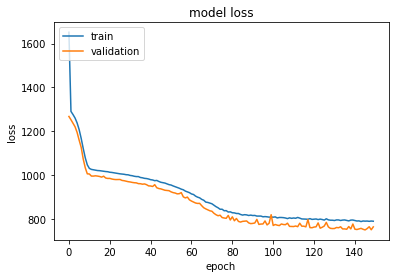

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# preprocess all test data set

In [ ]:
testdata = pd.read_csv('test.csv')

In [ ]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
testdata.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
testdata['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [ ]:
testdata['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
# create a list of our conditions
conditions = [
    (testdata['Item_Weight'] == 'Nan'),
    (testdata['Item_Weight'] > 4.50) & (testdata['Item_Weight'] <= 8.773),
    (testdata['Item_Weight'] > 8.773) & (testdata['Item_Weight'] <= 12.60),
    (testdata['Item_Weight'] > 12.60) & (testdata['Item_Weight'] <= 16.85),
    (testdata['Item_Weight'] > 16.85)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2', '3','4']

# create a new column and use np.select to assign values to it using our lists as arguments
testdata['Item_Weight_revised'] = np.select(conditions, values)

# display updated DataFrame
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_revised
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,4
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,2,Tier 2,Supermarket Type1,1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,Tier 3,Grocery Store,3
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,Tier 2,Supermarket Type1,1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0


In [ ]:
testdata.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Weight_revised            0
dtype: int64

In [ ]:
testdata['Item_Weight_revised'].replace(to_replace = '0', value = pd.NA, inplace=True)

In [ ]:
common5 = testdata['Item_Weight_revised'].isnull()
all_conditions5 = [(testdata['Item_MRP'] <= 137.79) & (common5),
                  (testdata['Item_MRP'] > 137.79)  & (testdata['Item_MRP'] < 140.37) & (common5),
                   (testdata['Item_MRP'] >= 140.37)  & (testdata['Item_MRP'] < 141.27) & (common5),
                  (testdata['Item_MRP'] >= 141.27)  & (common5)

                 ]

fill_with5 = ['1', '3', '2','4']
testdata['Item_Weight_revised'] = np.select(all_conditions5, fill_with5, default=testdata['Item_Weight_revised'])

In [ ]:
testdata.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Weight_revised            0
dtype: int64

In [ ]:
testdata['item_identified_first_3'] = testdata['Item_Identifier'].astype(str).str[0:2]

In [ ]:
testdata.loc[testdata["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
testdata.loc[testdata["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = 'Low Fat'

In [ ]:
testdata.loc[testdata["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = 'Regular'

In [ ]:
testdata['Item_Visibility'] = testdata['Item_Visibility'].astype('float')
testdata['Item_MRP'] = testdata['Item_MRP'].astype('float')
testdata['Item_Weight_revised'] = testdata['Item_Weight_revised'].astype('int64')

In [ ]:
testdata.drop(['Item_Identifier', 'Item_Weight'], axis=1)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_revised,item_identified_first_3
0,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,4,FD
1,Regular,0.038428,Dairy,87.3198,OUT017,2007,2,Tier 2,Supermarket Type1,1,FD
2,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,Tier 3,Grocery Store,3,NC
3,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,Tier 2,Supermarket Type1,1,FD
4,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4,FD
...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2,FD
5677,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1,FD
5678,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,Tier 2,Supermarket Type1,2,NC
5679,Regular,0.000000,Canned,214.6218,OUT017,2007,2,Tier 2,Supermarket Type1,3,FD


In [ ]:
testdata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Weight_revised            int64
item_identified_first_3       object
dtype: object

In [ ]:
testdata.loc[testdata["Outlet_Size"] == 2, "Outlet_Size"] = "Medium"

In [ ]:
testdata['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [ ]:


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
testdata['Outlet_Size']= label_encoder.fit_transform(testdata['Outlet_Size'])
testdata['Item_Fat_Content']= label_encoder.fit_transform(testdata['Item_Fat_Content'])



In [ ]:
testdata = pd.get_dummies(testdata, columns = categorical_cols)

In [ ]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Weight_revised,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_identified_first_3_DR,item_identified_first_3_FD,item_identified_first_3_NC
0,FDW58,20.750,0,0.007565,107.8622,1999,1,4,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300,1,0.038428,87.3198,2007,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600,0,0.099575,241.7538,1998,1,3,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315,0,0.015388,155.0340,2007,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,NaN,1,0.118599,234.2300,1985,1,4,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
testdata.isnull().sum()

Item_Identifier                      0
Item_Weight                        976
Item_Fat_Content                     0
Item_Visibility                      0
Item_MRP                             0
Outlet_Establishment_Year            0
Outlet_Size                          0
Item_Weight_revised                  0
Item_Type_Baking Goods               0
Item_Type_Breads                     0
Item_Type_Breakfast                  0
Item_Type_Canned                     0
Item_Type_Dairy                      0
Item_Type_Frozen Foods               0
Item_Type_Fruits and Vegetables      0
Item_Type_Hard Drinks                0
Item_Type_Health and Hygiene         0
Item_Type_Household                  0
Item_Type_Meat                       0
Item_Type_Others                     0
Item_Type_Seafood                    0
Item_Type_Snack Foods                0
Item_Type_Soft Drinks                0
Item_Type_Starchy Foods              0
Outlet_Identifier_OUT010             0
Outlet_Identifier_OUT013 

In [ ]:
del testdata['Item_Weight']

In [ ]:
testdata.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Weight_revised,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_identified_first_3_DR,item_identified_first_3_FD,item_identified_first_3_NC
0,FDW58,0,0.007565,107.8622,1999,1,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,1,0.038428,87.3198,2007,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,0,0.099575,241.7538,1998,1,3,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,0,0.015388,155.0340,2007,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,1,0.118599,234.2300,1985,1,4,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
testdata.isnull().sum()

Item_Identifier                    0
Item_Fat_Content                   0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Item_Weight_revised                0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
O

In [ ]:
testdata.dtypes

Item_Identifier                     object
Item_Fat_Content                     int32
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Outlet_Size                          int32
Item_Weight_revised                  int64
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Iden

In [ ]:
testdata['Item_Weight_revised'] = testdata['Item_Weight_revised'].astype('float')

In [ ]:
testdata.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Weight_revised,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_identified_first_3_DR,item_identified_first_3_FD,item_identified_first_3_NC
0,FDW58,0,0.007565,107.8622,1999,1,4.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,1,0.038428,87.3198,2007,1,1.0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,0,0.099575,241.7538,1998,1,3.0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,0,0.015388,155.0340,2007,1,1.0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,1,0.118599,234.2300,1985,1,4.0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
del testdata['Item_Identifier']

In [ ]:
testdata.shape

(5681, 42)

In [ ]:
prediction_test = model.predict(testdata)

178/178 [==============================] - 0s 593us/step


In [ ]:
prediction_test

array([[1397.2125],
       [1230.9149],
       [1597.9781],
       ...,
       [1722.0846],
       [3557.8792],
       [1142.93  ]], dtype=float32)

In [ ]:
finaltestdata = pd.read_csv('test.csv')

In [ ]:
finaltestdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
finaltestdata1 = finaltestdata[['Item_Identifier', 'Outlet_Identifier']].copy()

In [ ]:
finaltestdata1

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [ ]:

df = pd.DataFrame(prediction_test, columns = ['Item_Outlet_Sales'])

In [ ]:
df

,Item_Outlet_Sales
0,1397.212524
1,1230.914917
2,1597.978149
3,2459.124756
4,4697.864258
...,...
5676,1873.313477
5677,2078.116943
5678,1722.084595
5679,3557.879150


In [ ]:
df_col_merged = pd.concat([finaltestdata1, df], axis=1)

In [ ]:
df_col_merged

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1397.212524
1,FDW14,OUT017,1230.914917
2,NCN55,OUT010,1597.978149
3,FDQ58,OUT017,2459.124756
4,FDY38,OUT027,4697.864258
...,...,...,...
5676,FDB58,OUT046,1873.313477
5677,FDD47,OUT018,2078.116943
5678,NCO17,OUT045,1722.084595
5679,FDJ26,OUT017,3557.879150


In [ ]:
df_col_merged.to_csv('lokesh_bigmart.csv')

In [ ]:
df_col_merged.loc[df_col_merged['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales'] = 1